# Predict if number on image is prime or composite

Present notebook contains codes for images classification. Modified MNIST dataset has been used. 0 and 1 numbers has been deleted. Labels has been encoded into 0 and 1, where 0 is a prime number (2, 3, 5 or 7) and 1 is a composite number (4, 6, 8, or 9). The model used is custom artificial neural network. Model of the network was created with Tensorflow 2.0 and Keras as high level API. Model was tuned with Scikit-learn library. 

1. Data exploration
2. Data preparation
3. Data modelling
4. Model assessment
5. Hyperparameters tuning
6. Model assessment

## 1. Data exploration

### Extract specified part of data

In [5]:
# Extract image data:
import gzip
# Create BufferedReader object
f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 5

import numpy as np
# set specificiation (?) of importing bytes
f.read(16) # 16

# read data as bytes object
buf = f.read(image_size * image_size * num_images)

# Transform bytes to float numbers in 1-dimensional ndarray 
data_1 = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

# Reshape 1-dimensional array of data to 4 dimensions
data = data_1.reshape(num_images, image_size, image_size, 1)

In [6]:
# show 1-st row of ndarray (1-st dimension of data)
data[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [7]:
# Show shape of final ndarray
data.shape

(5, 28, 28, 1)

### Show choosen picture

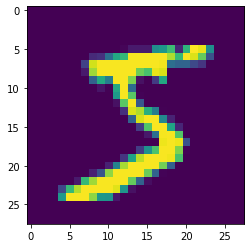

In [8]:
import matplotlib.pyplot as plt
# Cut first row, and reshape joining all sub arrays (from 1-st row)
image = np.asarray(data[0]).squeeze()
plt.imshow(image)
plt.show()

In [9]:
# Print first 10 labels:

# Create BufferedReader object
f = gzip.open('train-labels-idx1-ubyte.gz','r')

# set specificiation (?) of importing bytes
f.read(8) # 8

# Print labels in loop
for i in range(0,10):   
    buf = f.read(1) # read first byte?
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    print(labels)

[5]
[0]
[4]
[1]
[9]
[2]
[1]
[3]
[1]
[4]


### Extract data

In [10]:
import idx2numpy
import numpy as np

train_images_arr = idx2numpy.convert_from_file('train-images.idx3-ubyte')
# arr is now ndarray object of shape 60000, 28, 28
train_labels_arr = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

test_images_arr = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_labels_arr = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

### Check shape of arrays

In [11]:
train_images_arr.shape

(60000, 28, 28)

In [12]:
train_labels_arr.shape

(60000,)

In [13]:
test_images_arr.shape

(10000, 28, 28)

In [14]:
test_labels_arr.shape

(10000,)

## 2. Data preparation

### Recode dataset

In [15]:
# 1) Remove 0 and 1 from dataset 

# 2)  Recode labels from (2,3,5,7) to 0 (as prime numbers)
#     Recode labels from (4,6,8,9) to 1 (as composite numbers)


In [16]:
# Delete 0 and 1 from train dataset

In [17]:
# Get indices of 0, 1 from train set / check on which positions they are
indices_0_1_train = [i for i, value in np.ndenumerate(train_labels_arr) if value == 0 or value == 1 ]

In [105]:
indices_0_1_train[:10]

[(1,), (3,), (6,), (8,), (14,), (21,), (23,), (24,), (34,), (37,)]

In [19]:
len(indices_0_1_train)

12665

In [108]:
# Check labels in training set
train_labels_arr[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [21]:
# Get indices of 0, 1 from test set
indices_0_1_test = [i for i, value in np.ndenumerate(test_labels_arr) if value == 0 or value == 1 ]


In [22]:
indices_0_1_test[:4]

[(2,), (3,), (5,), (10,)]

### Delete 0 and 1 from images and labels arrays

In [23]:
# Delete labels of 0, 1 from train set
train_labels_arr_2 = np.delete(train_labels_arr, indices_0_1_train, axis=None)
# Delete pictures of 0, 1 from train set
train_images_arr_2 = np.delete(train_images_arr, indices_0_1_train, axis=0)

# Delete labels of 0, 1 from test set
test_labels_arr_2 = np.delete(test_labels_arr, indices_0_1_test, axis=None)
# Delete pictures of 0, 1 from test set
test_images_arr_2 = np.delete(test_images_arr, indices_0_1_test, axis=0)


In [24]:
train_labels_arr_2.shape

(47335,)

In [25]:
train_images_arr_2.shape

(47335, 28, 28)

In [26]:
test_labels_arr_2.shape

(7885,)

In [27]:
test_images_arr_2.shape

(7885, 28, 28)

### Recoding training set

In [28]:
# 2)  Recode labels from (2,3,5,7) to 0 (as prime numbers)
#     Recode labels from (4,6,8,9) to 1 (as composite numbers)

In [29]:
# Recode labels from (2,3,5,7) to 0 (as prime numbers)
train_labels_arr_2[ (train_labels_arr_2 == 2)|(train_labels_arr_2 == 3)|(train_labels_arr_2 == 5)|(train_labels_arr_2 == 7)] = 0

In [30]:
train_labels_arr_2[:70]

array([0, 4, 9, 0, 0, 4, 0, 0, 0, 6, 0, 0, 8, 6, 9, 4, 9, 0, 4, 0, 0, 0,
       0, 8, 6, 9, 0, 6, 0, 6, 8, 0, 9, 0, 9, 8, 0, 9, 0, 0, 0, 4, 9, 8,
       9, 4, 4, 4, 6, 4, 0, 6, 0, 6, 0, 0, 0, 9, 0, 6, 0, 8, 0, 9, 4, 6,
       0, 4, 6, 8], dtype=uint8)

In [31]:
# Check frequencies in changed ndarray
(unique, counts) = np.unique(train_labels_arr_2, return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [32]:
frequencies

array([[    0, 23775],
       [    4,  5842],
       [    6,  5918],
       [    8,  5851],
       [    9,  5949]], dtype=int64)

In [33]:
# Recode labels from (4,6,8,9) to 1 (as composite numbers)
train_labels_arr_2[ (train_labels_arr_2 == 4)|(train_labels_arr_2 == 6)|(train_labels_arr_2 == 8)|(train_labels_arr_2 == 9)] = 1

In [34]:
# Check frequencies in changed ndarray
(unique, counts) = np.unique(train_labels_arr_2, return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [35]:
frequencies

array([[    0, 23775],
       [    1, 23560]], dtype=int64)

### Recoding test set

In [36]:
# Recode labels from (2,3,5,7) to 0 (as prime numbers)
test_labels_arr_2[ (test_labels_arr_2 == 2)|(test_labels_arr_2 == 3)|(test_labels_arr_2 == 5)|(test_labels_arr_2 == 7)] = 0

In [37]:
test_labels_arr_2[:70]

array([0, 0, 4, 4, 9, 0, 9, 6, 9, 0, 9, 0, 0, 4, 9, 6, 6, 0, 4, 0, 4, 0,
       0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 6, 0, 0, 0, 6, 4, 9, 0,
       0, 8, 9, 0, 0, 4, 6, 4, 0, 0, 0, 9, 0, 0, 0, 9, 0, 0, 6, 0, 0, 8,
       4, 0, 0, 6], dtype=uint8)

In [38]:
# Check frequencies in changed ndarray
(unique, counts) = np.unique(test_labels_arr_2, return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [39]:
frequencies

array([[   0, 3962],
       [   4,  982],
       [   6,  958],
       [   8,  974],
       [   9, 1009]], dtype=int64)

In [40]:
# Recode labels from (4,6,8,9) to 1 (as composite numbers)
test_labels_arr_2[ (test_labels_arr_2 == 4)|(test_labels_arr_2 == 6)|(test_labels_arr_2 == 8)|(test_labels_arr_2 == 9)] = 1

In [41]:
# Check frequencies in changed ndarray
(unique, counts) = np.unique(test_labels_arr_2, return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [42]:
frequencies

array([[   0, 3962],
       [   1, 3923]], dtype=int64)

In [58]:
max(train_images_arr_2[0][9])

0.9921568627450981

### Data normalization

In [55]:
# Normalize dataset to <0,1> range
train_images_arr_2, test_images_arr_2 = train_images_arr_2 / 255.0, test_images_arr_2 / 255.0

In [58]:
max(train_images_arr_2[0][9])

0.9921568627450981

### Datasets rename

In [60]:
X_train, Y_train, X_test, Y_test = train_images_arr_2, train_labels_arr_2, test_images_arr_2, test_labels_arr_2

## 3. Data modelling

As far we deleted 0 and 1 from out datasets, both train and test. We also recoded all prime numbers to 0, and all composite numbers to 1. So our classifier will not differentiate between numbers among crtain groups. 

In [62]:
import tensorflow as tf
print (tf.__version__) # 2.0.0-alpha0

2.0.0-alpha0


### Create baseline model

In [77]:
# Create 2 layers neural network
model = tf.keras.models.Sequential([
        
  # flatten input array to 1d vector
  tf.keras.layers.Flatten(input_shape=(28, 28)), # output shape is 784
  
  # Add first layer consisted of 128 neurons, what is resulting 
  # in 100480 new parameters
  tf.keras.layers.Dense(128, activation='relu'),
  
  # Random dropout of choosen percentage of parameters between layers
  tf.keras.layers.Dropout(0.2),
  
  # add second layer consisted of 2 neurons
  # output shape is 2 - one output value for each prime and composite number
  tf.keras.layers.Dense(2, activation='softmax') 
])
# 10 neurons as output in last layer 

# configure learning process
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
# Show network structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 100,738
Trainable params: 100,738
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [79]:
# Model training
model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
47335/47335 [==============================] - 9s 197us/sample - loss: 0.1179 - accuracy: 0.9586
Epoch 2/50
47335/47335 [==============================] - 5s 107us/sample - loss: 0.0600 - accuracy: 0.9798
Epoch 3/50
47335/47335 [==============================] - 5s 107us/sample - loss: 0.0455 - accuracy: 0.9851
Epoch 4/50
47335/47335 [==============================] - 5s 107us/sample - loss: 0.0365 - accuracy: 0.9881
Epoch 5/50
47335/47335 [==============================] - 5s 107us/sample - loss: 0.0303 - accuracy: 0.9901
Epoch 6/50
47335/47335 [==============================] - 5s 108us/sample - loss: 0.0253 - accuracy: 0.9916
Epoch 7/50
47335/47335 [==============================] - 5s 107us/sample - loss: 0.0220 - accuracy: 0.9920
Epoch 8/50
47335/47335 [==============================] - 5s 106us/sample - loss: 0.0210 - accuracy: 0.9925
Epoch 9/50
47335/47335 [==============================] - 6s 123us/sample - loss: 0.0168 - accuracy: 0.9947
Epoch 10/50
47335/47335 [===

## 4. Model assessment

In [103]:
# Model evaluation
model.evaluate(X_test, Y_test)

7885/7885 [==============================] - 0s 61us/sample - loss: 0.0610 - accuracy: 0.9906


[0.06096666169312664, 0.99061507]

Model has pretty high 0.9906 accuracy on test set.

## Test network on particular examples

#### Get image from test set and predict

In [89]:
# Cut observation
X_obs_02 = np.expand_dims(X_test[0], axis = 0)

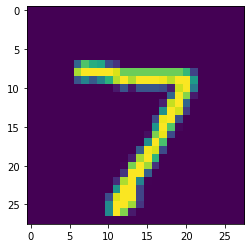

In [98]:
# Show image
import matplotlib.pyplot as plt
plt.imshow(X_test[0])
plt.show()

In [90]:
# Predict image class
prediction = model.predict(X_obs_02)
print(prediction)

[[1.000000e+00 5.532408e-18]]


Probablility that number is prime: 1.0000000e+00

Probablility that number is composite: 5.532408e-18

#### Create random image and test model

In [99]:
# Genereate observation - create an array
X_obs_01_2d = np.array([np.round(np.random.uniform(size = None),4) for i in range(784)]).reshape(28,28)
# add dim on axis = 0
X_obs_01 = np.expand_dims(X_obs_01_2d, axis=0)

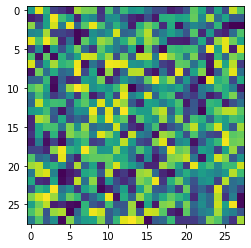

In [100]:
# Show image
import matplotlib.pyplot as plt
plt.imshow(X_obs_01_2d)
plt.show()

In [101]:
# Predict image class
prediction = model.predict(X_obs_01)
print(prediction)

[[4.2904677e-12 1.0000000e+00]]


Probablility that number is prime: 1.9249865e-22 

Probablility that number is composite: 1.0000000e+00

## 5. Hyperparameters tuning

## 6. Model assessment